# Total snow extension's comparison between initial and regridded files 

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import os
import xesmf as xe
import matplotlib.pyplot as plt

/srv/conda/envs/notebook/lib/python3.12/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(


In [2]:
# models
models = [
    "BCC-CSM2-MR", "CanESM5", "CanESM5-CanOE", "CESM2", "CESM2-WACCM", "CIESM",
    "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", "EC-Earth3", "EC-Earth3-Veg",
    "FGOALS-f3-L", "FGOALS-g3", "GFDL-CM4", "GISS-E2-1-G", "HadGEM3-GC31-LL",
    "IPSL-CM6A-LR", "MIROC-ES2L", "MIROC6", "MPI-ESM1-2-HR", "MPI-ESM1-2-LR",
    "MRI-ESM2-0", "NorESM2-LM", "NorESM2-MM", "UKESM1-0-LL"
]

In [3]:
# path initial files
path_ini = "/home/jovyan/private-storage/SnowWarming/"

In [4]:
datasets_ini = {}

for model in models:
    files_ini_path = os.path.join(path_ini, f"SnowWarming_{model}_historical+ssp585.nc")
    datasets_ini[model] = xr.open_dataset(files_ini_path)

In [5]:
# path regridded files
path_regrid = "/home/jovyan/private-storage/interp_models/"

In [6]:
datasets_regrid = {}

for model in models:
    files_regrid_path = os.path.join(path_regrid, f"{model}_reprojete.nc")
    datasets_regrid[model] = xr.open_dataset(files_regrid_path)

In [7]:
# areacella
path_areacella = "/home/jovyan/private-storage/masques/masques/areacella/"
path_pseudo_areacella = "/home/jovyan/private-storage/masques/masques/pseudo_areacella/"

In [8]:
datasets_area = {}
for model in models:
    area_file_path = os.path.join(path_areacella, f"areacella_{model}.nc")
    pseudo_area_file_path = os.path.join(path_pseudo_areacella, f"areacella_{model}.nc")

    if os.path.exists(area_file_path):
        datasets_area[model] = xr.open_dataset(area_file_path)['areacella']
    elif os.path.exists(pseudo_area_file_path):
        datasets_area[model] = xr.open_dataset(pseudo_area_file_path)['areacella']
    else:
        print(f"⚠️ Pas de fichier d'aire trouvé pour {model} !")
        datasets_area[model] = None

/srv/conda/envs/notebook/lib/python3.12/site-packages/xarray/conventions.py:193: SerializationWarning: variable 'areacella' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


In [9]:
area = datasets_area[model]

In [10]:
for model, ds in datasets_ini.items():
    if model not in datasets_area or datasets_area[model] is None:
        print(f"⏭️ Modèle {model} ignoré car pas d'aire disponible.")
        continue

In [11]:
snow_cover = ds["sncbin"]
snow_cover = snow_cover.groupby("month").mean(dim="month")

In [12]:
ds

<xarray.Dataset> Size: 37MB
Dimensions:  (month: 12, GSAT: 23, lat: 144, lon: 192, Level: 5)
Coordinates:
  * month    (month) float32 48B 1.0 2.0 3.0 4.0 5.0 ... 8.0 9.0 10.0 11.0 12.0
  * GSAT     (GSAT) float32 92B -0.5 -0.25 0.0 0.25 0.5 ... 4.25 4.5 4.75 5.0
  * lat      (lat) float32 576B -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * lon      (lon) float32 768B 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
  * Level    (Level) float32 20B 10.0 25.0 50.0 75.0 90.0
Data variables:
    sncbin   (GSAT, month, lat, lon) float32 31MB ...
    Limit    (Level, month, lat, lon) float32 7MB ...

In [13]:
snow_cover

<xarray.DataArray 'sncbin' (GSAT: 23, month: 12, lat: 144, lon: 192)> Size: 31MB
array([[[[          nan,           nan,           nan, ...,
                    nan,           nan,           nan],
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan],
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan],
         ...,
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan],
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan],
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan]],

        [[          nan,           nan,           nan, ...,
                    nan,           nan,           nan],
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan],
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan],
...
         [1.0000002e+20, 1.0000002e+20, 1.0000002e+20, ...,
          1.0000002e+20, 1.0000002e+20, 1.0000002e+20],
         [1.0000002e+20, 1.0000002e+20, 1.0000002e+20, ...,
          1.0000002e+20, 1.0000002e+20, 1.0000002e+20],
         [1.0000002e+20, 1.0000002e+20, 1.0000002e+20, ...,
          1.0000002e+20, 1.0000002e+20, 1.0000002e+20]],

        [[1.0000000e+02, 1.0000000e+02, 1.0000000e+02, ...,
          1.0000000e+02, 1.0000000e+02, 1.0000000e+02],
         [1.0000000e+02, 1.0000000e+02, 1.0000000e+02, ...,
          1.0000000e+02, 1.0000000e+02, 1.0000000e+02],
         [1.0000000e+02, 1.0000000e+02, 1.0000000e+02, ...,
          1.0000000e+02, 1.0000000e+02, 1.0000000e+02],
         ...,
         [1.0000002e+20, 1.0000002e+20, 1.0000002e+20, ...,
          1.0000002e+20, 1.0000002e+20, 1.0000002e+20],
         [1.0000002e+20, 1.0000002e+20, 1.0000002e+20, ...,
          1.0000002e+20, 1.0000002e+20, 1.0000002e+20],
         [1.0000002e+20, 1.0000002e+20, 1.0000002e+20, ...,
          1.0000002e+20, 1.0000002e+20, 1.0000002e+20]]]], dtype=float32)
Coordinates:
  * GSAT     (GSAT) float32 92B -0.5 -0.25 0.0 0.25 0.5 ... 4.25 4.5 4.75 5.0
  * lat      (lat) float32 576B -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * lon      (lon) float32 768B 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
  * month    (month) float32 48B 1.0 2.0 3.0 4.0 5.0 ... 8.0 9.0 10.0 11.0 12.0
Attributes:
    units:          %
    standard_name:  surface_snow_area_fraction
    long_name:      Snow Area Percentage

In [14]:
monthly_mean = snow_cover.mean(dim=("lat", "lon"))
monthly_mean

<xarray.DataArray 'sncbin' (GSAT: 23, month: 12)> Size: 1kB
array([[          nan,           nan, 5.4597569e+01, 5.0313999e+01,
                  nan,           nan,           nan,           nan,
                  nan,           nan,           nan,           nan],
       [6.1378772e+19, 6.1378750e+19, 6.1378741e+19, 6.1378741e+19,
        6.1378750e+19, 6.1378768e+19, 6.1378772e+19, 6.1378772e+19,
        6.1378772e+19, 6.1378772e+19, 6.1378772e+19, 6.1378772e+19],
       [6.1378820e+19, 6.1378816e+19, 6.1378812e+19, 6.1378812e+19,
        6.1378816e+19, 6.1378816e+19, 6.1378820e+19, 6.1378820e+19,
        6.1378820e+19, 6.1378820e+19, 6.1378820e+19, 6.1378820e+19],
       [5.6622692e+01, 5.5740654e+01, 5.3716461e+01, 4.9102753e+01,
        4.3764606e+01, 3.7455940e+01, 3.1235065e+01, 3.1977602e+01,
        6.1378768e+19, 6.1378768e+19, 5.1386356e+01, 5.5552971e+01],
       [5.6350868e+01, 6.1378759e+19, 5.3951839e+01, 4.9411095e+01,
        4.3449310e+01, 6.1378759e+19, 6.1378759e+19, 6.1378759e+19,
        3.8446877e+01, 4.6016628e+01, 6.1378759e+19, 6.1378759e+19],
       [5.6527115e+01, 6.1378759e+19, 5.3430561e+01, 4.8843822e+01,
        4.2685211e+01, 6.1378759e+19, 6.1378759e+19, 6.1378759e+19,
        3.8211578e+01, 4.4875298e+01, 6.1378759e+19, 5.5887852e+01],
       [5.6051086e+01, 5.4811104e+01, 5.2884129e+01, 4.8753338e+01,
        4.3040127e+01, 3.6079563e+01, 3.0635521e+01, 3.1282228e+01,
...
        3.1001270e+01, 3.9301914e+01, 4.7085354e+01, 5.4059753e+01],
       [5.5998848e+01, 5.4002903e+01, 4.9752640e+01, 4.4088203e+01,
        3.8151768e+01, 3.1630424e+01, 2.9706085e+01, 2.9634331e+01,
        3.1076128e+01, 3.9161091e+01, 4.6499016e+01, 5.4051414e+01],
       [5.5411343e+01, 5.3763863e+01, 5.0067822e+01, 4.3264908e+01,
        3.7730762e+01, 3.1041149e+01, 2.9543417e+01, 2.9686609e+01,
        3.0503948e+01, 3.8413677e+01, 4.7370895e+01, 5.2632175e+01],
       [5.4483353e+01, 5.3428368e+01, 4.9432537e+01, 4.3204998e+01,
        3.7391224e+01, 3.1136040e+01, 2.9554308e+01, 2.9563526e+01,
        3.0621449e+01, 3.8114872e+01, 4.5865128e+01, 5.1815136e+01],
       [5.5342262e+01, 5.3591991e+01, 4.9566769e+01, 4.2761387e+01,
        3.7353539e+01, 3.0644144e+01, 2.9523149e+01, 2.9554678e+01,
        3.0367586e+01, 3.8422329e+01, 4.5564327e+01, 5.1826317e+01],
       [5.4495613e+01, 5.2815708e+01, 4.8660370e+01, 4.2890453e+01,
        3.6870918e+01, 3.0387108e+01, 2.9531910e+01, 2.9511473e+01,
        3.0143120e+01, 3.7752182e+01, 4.5693127e+01, 5.1635311e+01],
       [6.1378781e+19, 6.1378781e+19, 6.1378781e+19, 6.1378781e+19,
        6.1378781e+19, 6.1378781e+19, 6.1378772e+19, 6.1378772e+19,
        6.1378772e+19, 6.1378772e+19, 6.1378772e+19, 6.1378772e+19]],
      dtype=float32)
Coordinates:
  * GSAT     (GSAT) float32 92B -0.5 -0.25 0.0 0.25 0.5 ... 4.25 4.5 4.75 5.0
  * month    (month) float32 48B 1.0 2.0 3.0 4.0 5.0 ... 8.0 9.0 10.0 11.0 12.0

In [15]:
snow_cover_km2 = (snow_cover * (area * 1e-6)).groupby(snow_cover["month"]).sum(dim=["lat", "lon"], skipna=True)
snow_cover_km2

<xarray.DataArray (GSAT: 23, month: 12)> Size: 1kB
array([[0.0000000e+00, 0.0000000e+00, 5.8693309e+09, 4.9457382e+09,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [3.3838065e+28, 3.3838065e+28, 3.3838065e+28, 3.3838065e+28,
        3.3838065e+28, 3.3838065e+28, 3.3838065e+28, 3.3838065e+28,
        3.3838065e+28, 3.3838065e+28, 3.3838065e+28, 3.3838065e+28],
       [3.3838065e+28, 3.3838065e+28, 3.3838065e+28, 3.3838065e+28,
        3.3838065e+28, 3.3838065e+28, 3.3838065e+28, 3.3838065e+28,
        3.3838065e+28, 3.3838065e+28, 3.3838065e+28, 3.3838065e+28],
       [6.3227781e+09, 6.1360548e+09, 5.6530355e+09, 4.6861348e+09,
        3.6397353e+09, 2.6733755e+09, 1.8884114e+09, 1.9368379e+09,
        3.3838065e+28, 3.3838065e+28, 5.1145421e+09, 6.0464763e+09],
       [6.2527017e+09, 3.3838065e+28, 5.7389476e+09, 4.7553152e+09,
        3.5884429e+09, 3.3838065e+28, 3.3838065e+28, 3.3838065e+28,
        2.7649536e+09, 4.0482007e+09, 3.3838065e+28, 3.3838065e+28],
       [6.2806692e+09, 3.3838065e+28, 5.6254700e+09, 4.6448415e+09,
        3.4686113e+09, 3.3838065e+28, 3.3838065e+28, 3.3838065e+28,
        2.7329239e+09, 3.8443686e+09, 3.3838065e+28, 6.1063598e+09],
       [6.1639875e+09, 5.9127260e+09, 5.5091645e+09, 4.6257495e+09,
        3.5246157e+09, 2.4615542e+09, 1.7855821e+09, 1.8520763e+09,
...
        1.7775337e+09, 2.8692416e+09, 4.2482939e+09, 5.6192671e+09],
       [6.1165107e+09, 5.7444639e+09, 4.8644654e+09, 3.7737388e+09,
        2.7325248e+09, 1.8732334e+09, 1.6564110e+09, 1.6240556e+09,
        1.7904630e+09, 2.8840681e+09, 4.1596559e+09, 5.6504673e+09],
       [5.9454213e+09, 5.6625843e+09, 4.9666734e+09, 3.6116475e+09,
        2.6759631e+09, 1.8053891e+09, 1.6212305e+09, 1.6383425e+09,
        1.7149870e+09, 2.7781386e+09, 4.3074493e+09, 5.3039391e+09],
       [5.7604854e+09, 5.6022308e+09, 4.7976950e+09, 3.6106007e+09,
        2.6240927e+09, 1.7974780e+09, 1.6355936e+09, 1.6207843e+09,
        1.7254680e+09, 2.7085476e+09, 4.0078925e+09, 5.1928008e+09],
       [5.9118034e+09, 5.6430198e+09, 4.8404280e+09, 3.5107264e+09,
        2.6218066e+09, 1.7614861e+09, 1.6284142e+09, 1.6253505e+09,
        1.7201645e+09, 2.7589793e+09, 3.9546304e+09, 5.1712573e+09],
       [5.7298755e+09, 5.4697544e+09, 4.6469678e+09, 3.5465866e+09,
        2.5245015e+09, 1.7220700e+09, 1.6217715e+09, 1.6179304e+09,
        1.6787319e+09, 2.6621627e+09, 3.9826964e+09, 5.0955924e+09],
       [3.3838065e+28, 3.3838065e+28, 3.3838065e+28, 3.3838065e+28,
        3.3838065e+28, 3.3838065e+28, 3.3838065e+28, 3.3838065e+28,
        3.3838065e+28, 3.3838065e+28, 3.3838065e+28, 3.3838065e+28]],
      dtype=float32)
Coordinates:
  * GSAT     (GSAT) float32 92B -0.5 -0.25 0.0 0.25 0.5 ... 4.25 4.5 4.75 5.0
  * month    (month) float32 48B 1.0 2.0 3.0 4.0 5.0 ... 8.0 9.0 10.0 11.0 12.0

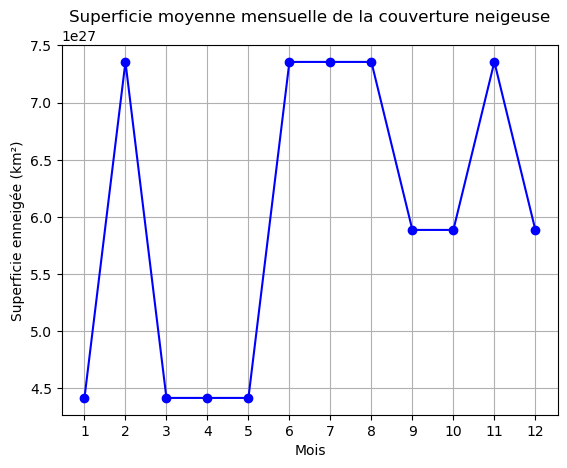

In [16]:
# Calcul de la moyenne sur l'axe GSAT
snow_cover_km2_mean = snow_cover_km2.mean(dim="GSAT")

# Tracer l'évolution de la superficie enneigée moyenne sur les 12 mois
plt.plot(range(1, 13), snow_cover_km2_mean, marker="o", color="b")

# Personnalisation du graphique
plt.xlabel("Mois")
plt.ylabel("Superficie enneigée (km²)")
plt.title("Superficie moyenne mensuelle de la couverture neigeuse")
plt.grid(True)
plt.xticks(range(1, 13))  # Assurer que les mois soient bien représentés sur l'axe X
plt.show()

In [17]:
total_snow_expansion = {}

for model, ds in datasets_ini.items():
    if model not in datasets_area or datasets_area[model] is None:
        print(f"⏭️ Modèle {model} ignoré car pas d'aire disponible.")
        continue

    area = datasets_area[model]

    if set(area.dims) != set(ds['sncbin'].dims[-2:]):
        print(f"⚠️ Dimensions non compatibles pour {model}, besoin d'un rééchantillonnage !")
        continue

    # Correction des valeurs aberrantes de sncbin (doit être 0 ou 1)
    ds['sncbin'] = ds['sncbin'].clip(0, 1)
    print(ds['sncbin'].min().item(), ds['sncbin'].max().item())

    # Ajustement des dimensions de l’aire
    area_expanded = area.broadcast_like(ds['sncbin'])
    print(ds['sncbin'].dims, area_expanded.dims)
    print((area / 1e12).min().item(), (area / 1e12).max().item())

    # Calcul de l'expansion totale de la neige
    snow_expansion = (ds['sncbin'] * area_expanded).sum(dim=("lat", "lon")) / 1e12  # Conversion en millions de km²

    total_snow_expansion[model] = snow_expansion
    print(snow_expansion.min().item(), snow_expansion.max().item())

0.0 1.0
('GSAT', 'month', 'lat', 'lon') ('GSAT', 'month', 'lat', 'lon')
0.00024285269035960656 0.015599262090208317
0.0 423.5380687361803
0.0 1.0
('GSAT', 'month', 'lat', 'lon') ('GSAT', 'month', 'lat', 'lon')
0.003553324146196246 0.0970204770565033
0.0 0.0
0.0 1.0
('GSAT', 'month', 'lat', 'lon') ('GSAT', 'month', 'lat', 'lon')
0.003553324146196246 0.0970204770565033
0.0 0.0
0.0 1.0
('GSAT', 'month', 'lat', 'lon') ('GSAT', 'month', 'lat', 'lon')
2.9948367227916606e-05 0.014565638266503811
0.01725025475025177 0.01725025475025177
0.0 1.0
('GSAT', 'month', 'lat', 'lon') ('GSAT', 'month', 'lat', 'lon')
2.9948367227916606e-05 0.014565638266503811
0.01725025475025177 0.01725025475025177
0.0 1.0
('GSAT', 'month', 'lat', 'lon') ('GSAT', 'month', 'lat', 'lon')
2.9943754257564607e-05 0.014565209803771913
0.0 417.07717910743315
0.0 1.0
('GSAT', 'month', 'lat', 'lon') ('GSAT', 'month', 'lat', 'lon')
0.00045195859274826944 0.024353764951229095
0.0 0.0
0.0 1.0
('GSAT', 'month', 'lat', 'lon') ('GSAT'

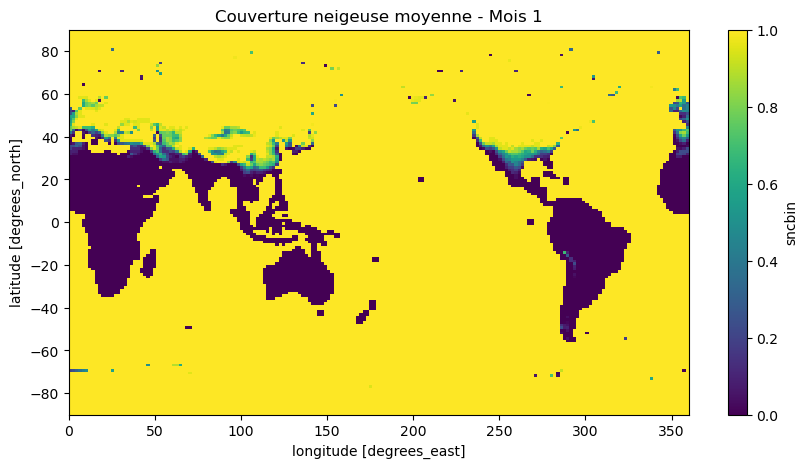

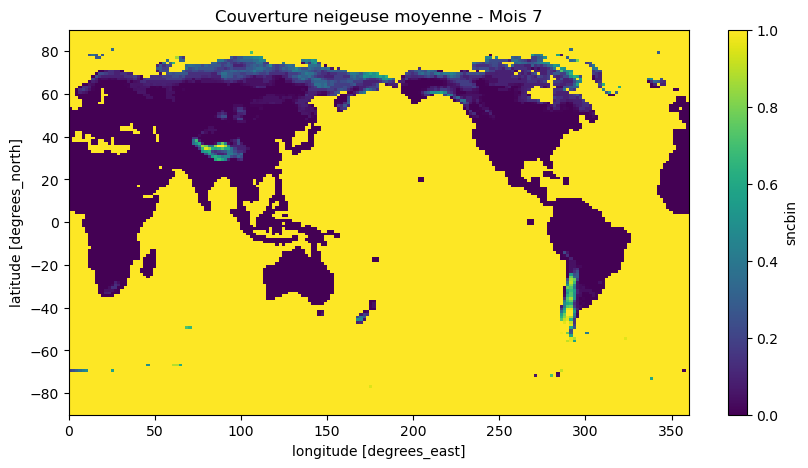

In [18]:
for month in [1, 7]:
    snow_map = ds['sncbin'].sel(month=month).mean(dim="GSAT")
    
    plt.figure(figsize=(10, 5))
    snow_map.plot()
    plt.title(f"Couverture neigeuse moyenne - Mois {month}")
    plt.show()

<Figure size 800x500 with 0 Axes>

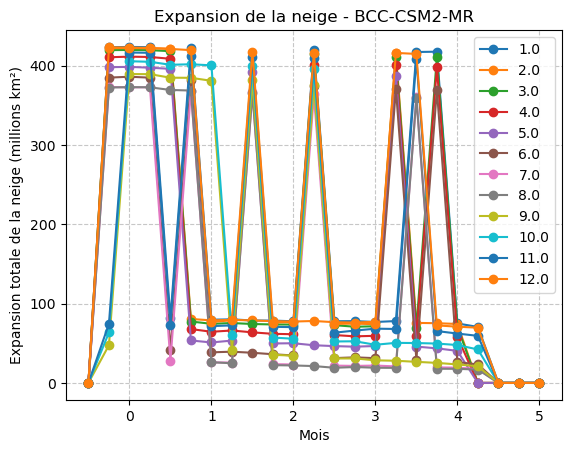

<Figure size 800x500 with 0 Axes>

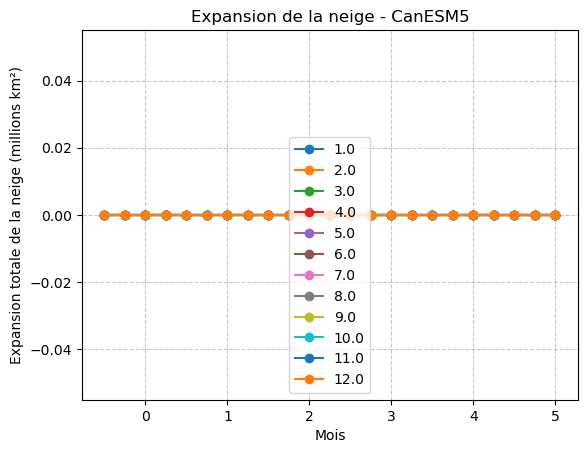

<Figure size 800x500 with 0 Axes>

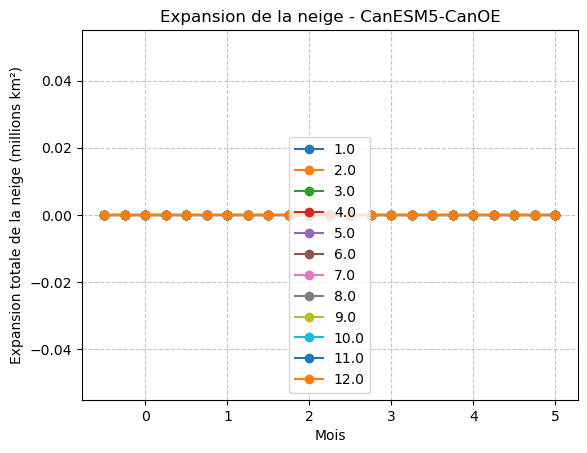

<Figure size 800x500 with 0 Axes>

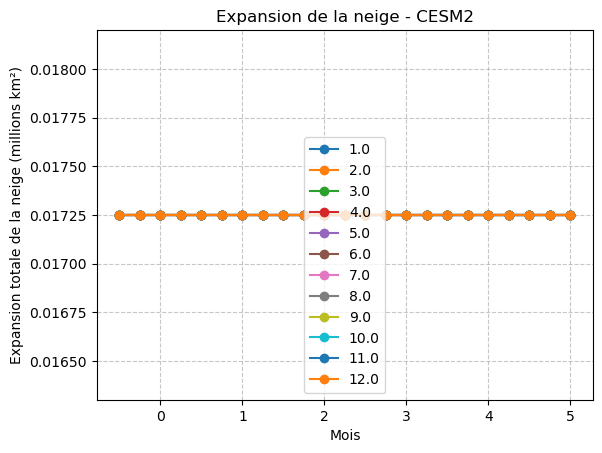

<Figure size 800x500 with 0 Axes>

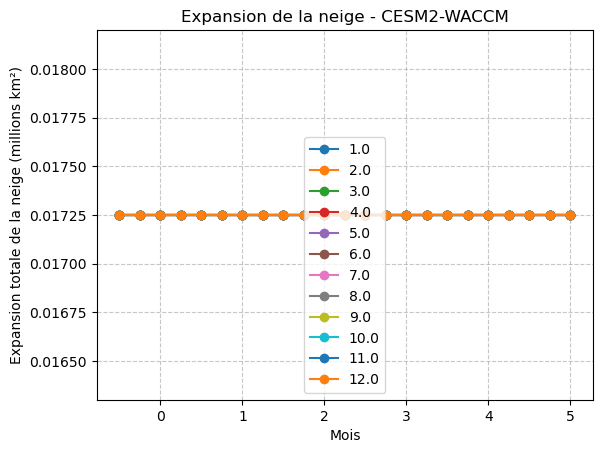

<Figure size 800x500 with 0 Axes>

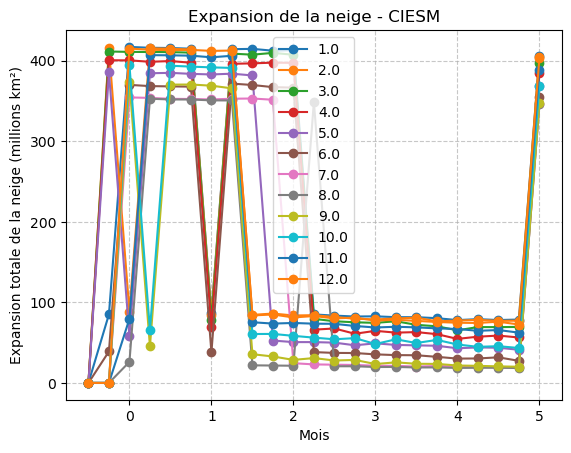

<Figure size 800x500 with 0 Axes>

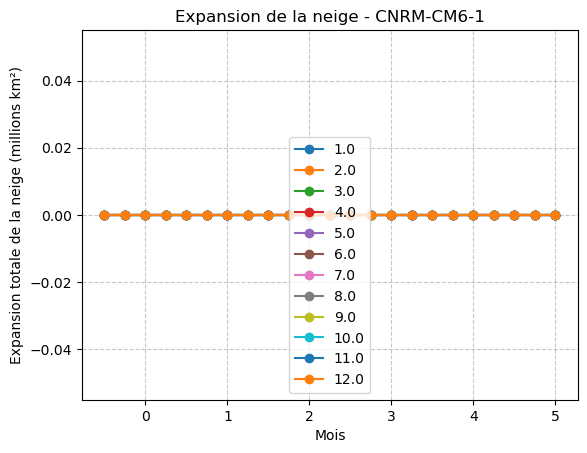

<Figure size 800x500 with 0 Axes>

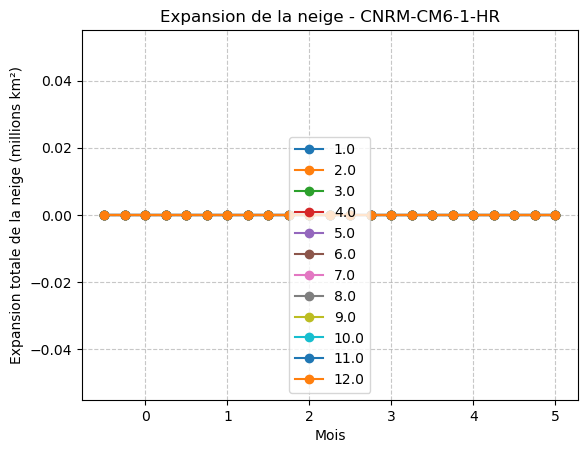

<Figure size 800x500 with 0 Axes>

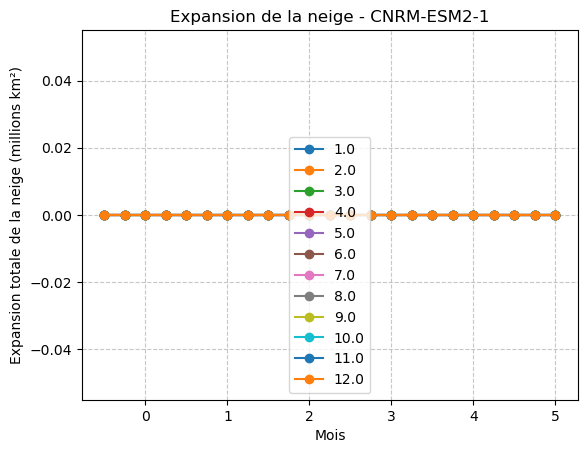

<Figure size 800x500 with 0 Axes>

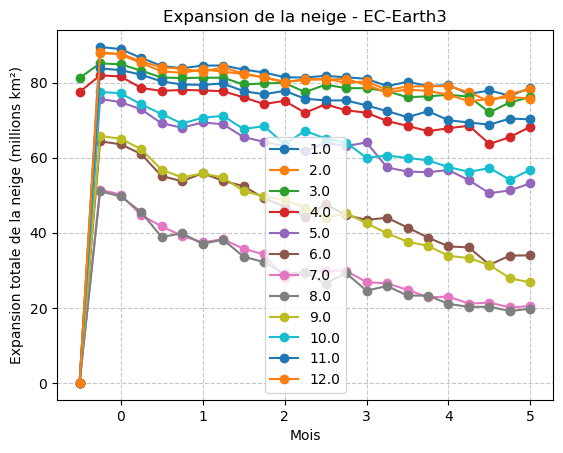

<Figure size 800x500 with 0 Axes>

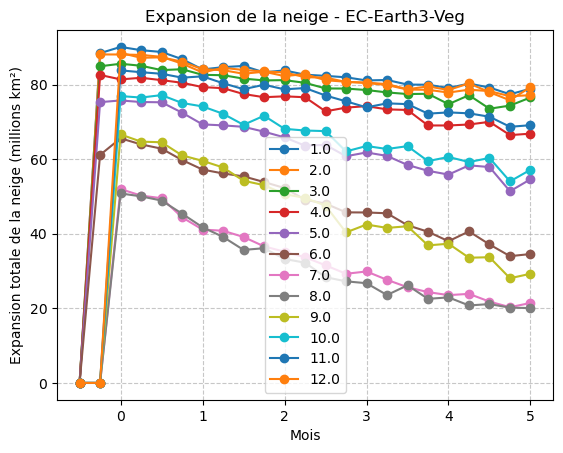

<Figure size 800x500 with 0 Axes>

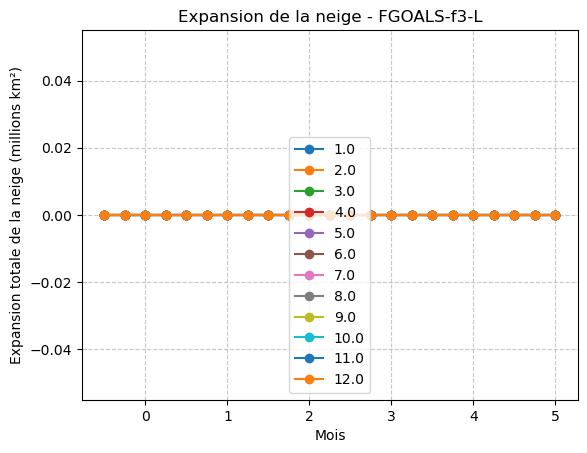

<Figure size 800x500 with 0 Axes>

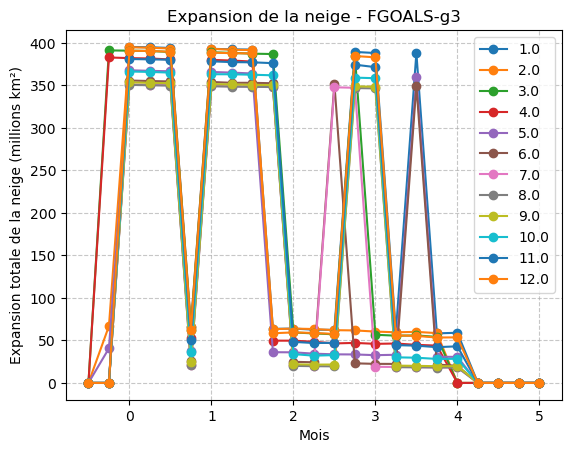

<Figure size 800x500 with 0 Axes>

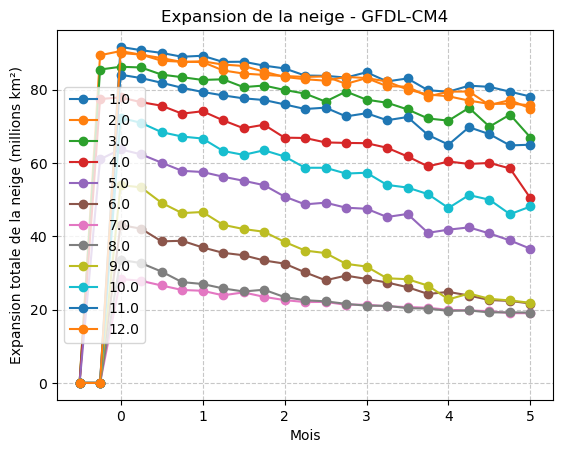

<Figure size 800x500 with 0 Axes>

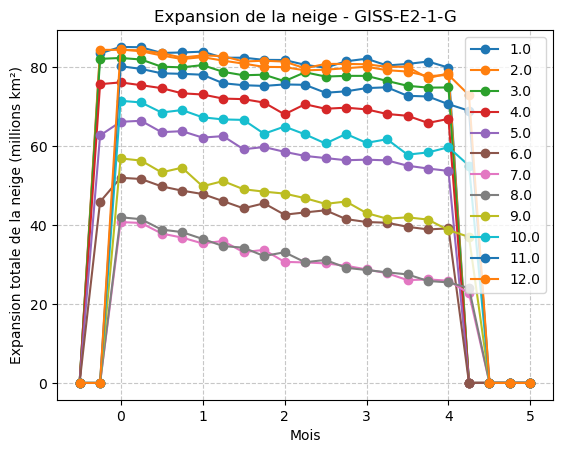

<Figure size 800x500 with 0 Axes>

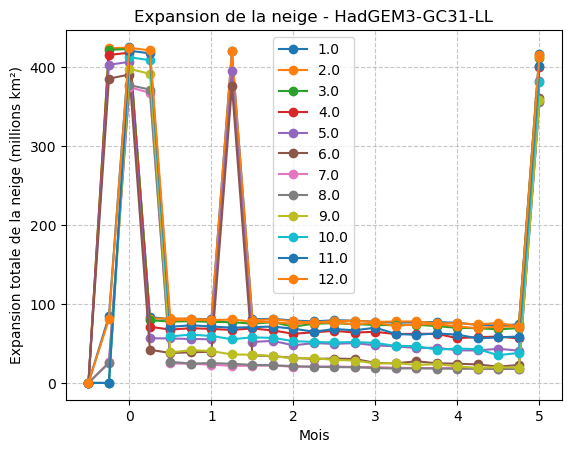

<Figure size 800x500 with 0 Axes>

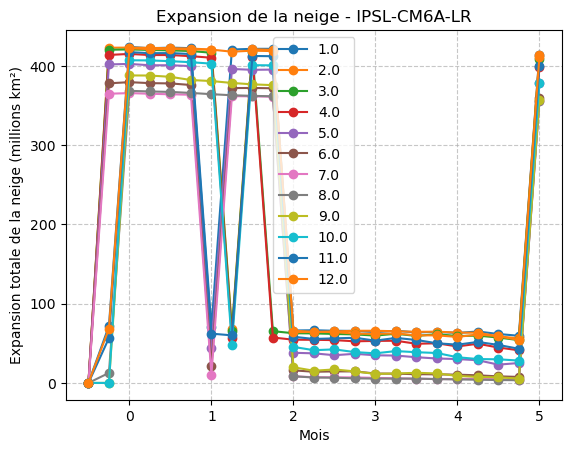

<Figure size 800x500 with 0 Axes>

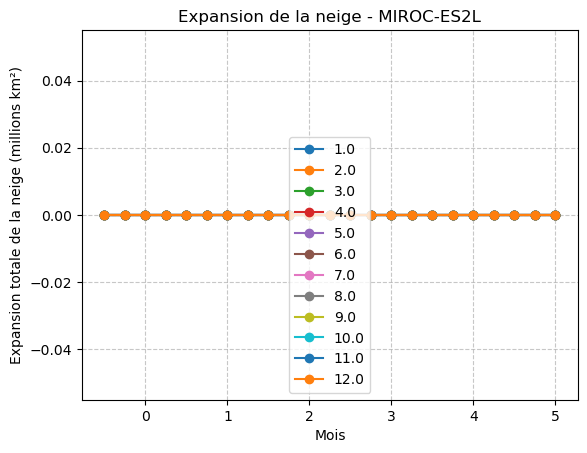

<Figure size 800x500 with 0 Axes>

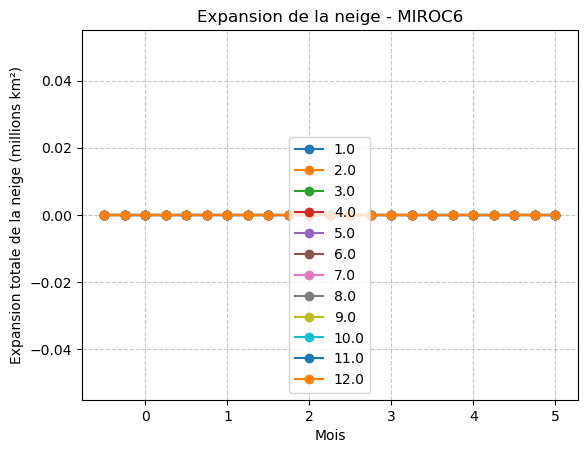

<Figure size 800x500 with 0 Axes>

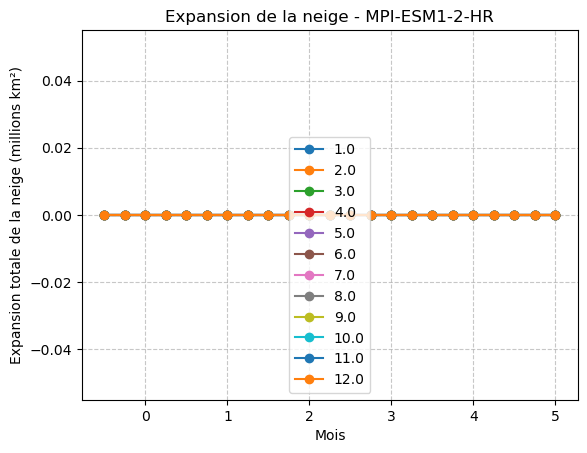

<Figure size 800x500 with 0 Axes>

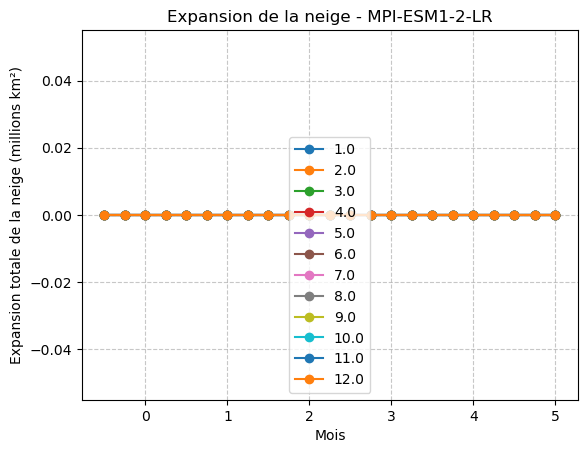

<Figure size 800x500 with 0 Axes>

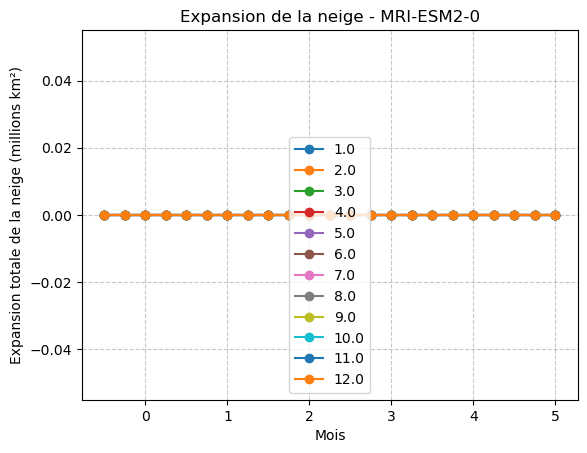

<Figure size 800x500 with 0 Axes>

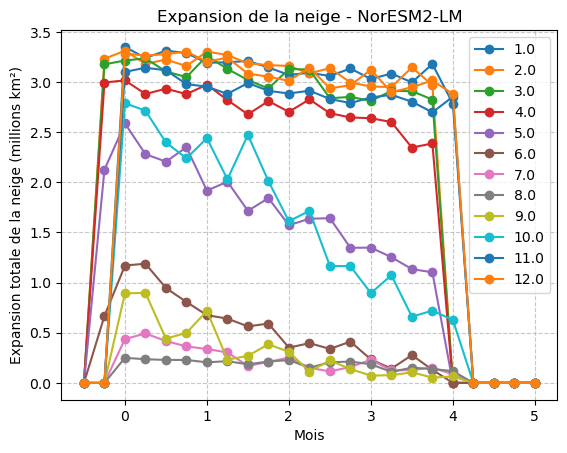

<Figure size 800x500 with 0 Axes>

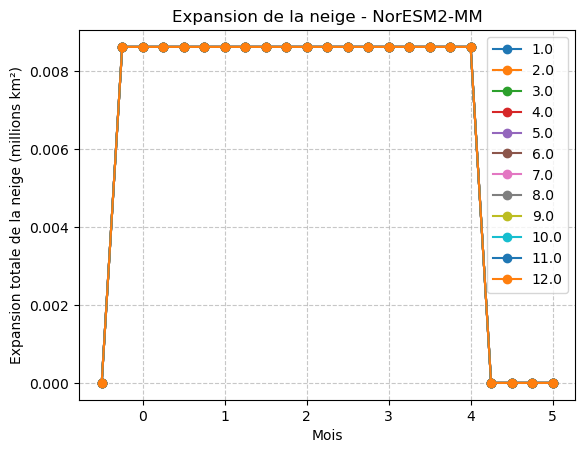

<Figure size 800x500 with 0 Axes>

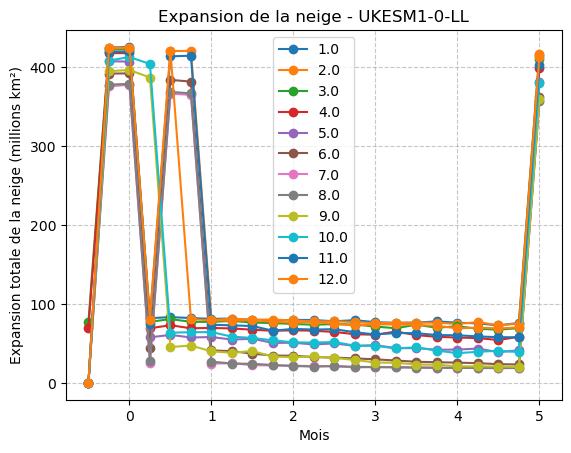

In [19]:
for model, expansion in total_snow_expansion.items():
    plt.figure(figsize=(8, 5))

    expansion.to_pandas().plot(marker='o', linestyle='-', label=model)

    plt.xlabel("Mois")
    plt.ylabel("Expansion totale de la neige (millions km²)")
    plt.title(f"Expansion de la neige - {model}")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.7)

    plt.show()

In [20]:
ds['sncbin'].values

array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[ 1.,  1.,  1., ...,  1.,  1.,  1.],
         [ 1.,  1.,  1., ...,  1.,  1.,  1.],
         [ 1.,  1.,  1., ...,  1.,  1.,  1.],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        ...,

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan